***Zomato/Swiggy Order***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings globally
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/SwiggyOrderProject/Rider-Info.csv")

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

** UNDERSTANDING THE DATA**


That is a great dataset to focus on! The Swiggy/Zomato Order Information dataset often contains highly valuable data points for analyzing the operations and efficiency of food delivery platforms.
Here is a guide on the typical structure of this dataset and the most impactful analysis projects you can create for your portfolio:

1. Typical Data Fields

The "Swiggy/Zomato Order Information" dataset focuses on the **time and distance metrics of a delivery and the performance of the riders**, rather than the menu or restaurant details.

- Category: Order & Time
- Key Column Names: order_time, delivered_time, cancelled_time, order_date
- Description for Analysis: Used for calculating total delivery time, peak hours, and success/failure rates.

-------------------


- Category: Logistics
- Key Column Names: first_mile_distance, last_mile_distance, pickup_time
- Description for Analysis:Used for calculating travel time, pick-up time efficiency, and delivery route optimization.
--------------------

- Category: Rider Performance
- Key Column Names:rider_id, allotted_orders, delivered_orders, lifetime_order_count
- Description for Analysis: Used for assessing rider experience, capacity, and identifying high/low performers.
-----------------------

- Category:Status
- Key Column Names:cancelled, reassigned_order, reassignment_reason, booking_status
- Description for Analysis:
Used for determining sources of inefficiency and high-friction points in the process.


> Add blockquote



### 📝 Delivery Order Dataset - Column Descriptions

| # | Column Name | Data Type | Description |
| :--- | :--- | :--- | :--- |
| 0 | order_time | object | The precise **time** when the customer placed the order (e.g., 'HH:MM:SS'). |
| 1 | order_id | int64 | A **unique identifier** for each specific order. |
| 2 | order_date | object | The **date** on which the order was placed. |
| 3 | allot_time | object | The time when the order was **first assigned** to a delivery rider. |
| 4 | accept_time | object | The time when the assigned rider **accepted** the order. |
| 5 | pickup_time | object | The time when the rider **picked up** the order from the store/restaurant. |
| 6 | delivered_time | object | The final time when the order was successfully **delivered** to the customer. |
| 7 | rider_id | int64 | A **unique identifier** for the delivery executive/rider assigned to the order. |
| 8 | first_mile_distance | float64 | The distance (in km or miles) from the **store/restaurant to the delivery rider's location** at the time of allotment. |
| 9 | last_mile_distance | float64 | The distance (in km or miles) from the **store/restaurant to the customer's location**. This is the actual delivery distance. |
| 10 | alloted_orders | float64 | The total count of orders **allotted** to this specific rider *prior* to this current order during the ongoing session/period. |
| 11 | delivered_orders | float64 | The total count of orders **successfully delivered** by this specific rider *prior* to this current order. |
| 12 | cancelled | int64 | A **binary flag** (0 or 1) indicating if the order was ultimately **cancelled** (1 = Cancelled, 0 = Not Cancelled). |
| 13 | undelivered_orders | float64 | The total count of orders **unsuccessful/undelivered** by this specific rider *prior* to this current order. |
| 14 | lifetime_order_count | float64 | The rider's **total number of completed orders** across their entire history (lifetime). |
| 15 | reassignment_method | object | The **method** used for reassigning the order to a new rider (e.g., 'automatic', 'manual'). |
| 16 | reassignment_reason | object | The **reason** the order had to be reassigned (e.g., 'rider didn't accept', 'long waiting time'). |
| 17 | reassigned_order | float64 | A **binary flag** (0 or 1) indicating if the order was **reassigned** to a different rider. |
| 18 | session_time | float64 | The **time elapsed** (in minutes/seconds) since the rider started their delivery session/shift. |
| 19 | cancelled_time | object | The precise **time** when the order cancellation occurred. |

In [4]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


#Cleaning of Data

##Data Types

In [5]:
df.head(3)

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN


In [6]:
df.dtypes

,0
order_time,object
order_id,int64
order_date,object
allot_time,object
accept_time,object
pickup_time,object
delivered_time,object
rider_id,int64
first_mile_distance,float64
last_mile_distance,float64


In [7]:
df['order_time'] = pd.to_datetime(df['order_time'], format='mixed')

In [8]:
a = ['order_time', 'order_date','allot_time','accept_time','pickup_time','delivered_time', 'cancelled_time']
for i in a:
  df[i] = pd.to_datetime(df[i],format='mixed')

In [9]:
df['reassignment_reason'].unique()

array([nan, 'Reassignment Request from SE portal.',
       'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'Reassign'], dtype=object)

In [10]:
df.dtypes

,0
order_time,datetime64[ns]
order_id,int64
order_date,datetime64[ns]
allot_time,datetime64[ns]
accept_time,datetime64[ns]
pickup_time,datetime64[ns]
delivered_time,datetime64[ns]
rider_id,int64
first_mile_distance,float64
last_mile_distance,float64


#NULL VALUES

In [11]:
def func(x):
  dd = pd.DataFrame(index = x.columns)
  dd['nullcount'] = x.isnull().sum()
  dd['count'] = x.count()
  dd['unique']= x.nunique()
  return dd

func(df)

,nullcount,count,unique
order_time,0,450000,252868
order_id,0,450000,449999
order_date,0,450000,12
allot_time,0,450000,246871
accept_time,157,449843,254201
pickup_time,2421,447579,257117
delivered_time,5218,444782,257067
rider_id,0,450000,19537
first_mile_distance,0,450000,93743
last_mile_distance,0,450000,1331


In [12]:
## order_date

df.drop('order_date',axis=1, inplace=True)

In [13]:
## Removing this feature NaN values as most of the columns row values having NaN values here
df = df[~df['lifetime_order_count'].isnull()]

In [14]:
df[df['lifetime_order_count']==0]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
22669,2021-01-26 14:56:32,579422,2021-01-26 14:56:33,2021-01-26 14:57:44,2021-01-26 15:12:45,NaT,21498,2.9383,1.34,1.0,NaN,1,NaN,0.0,NaN,NaN,NaN,2.900000,2021-01-26 16:13:09
170233,2021-01-30 09:50:20,409297,2021-01-30 10:11:41,2021-01-30 10:13:09,2021-01-30 10:23:39,NaT,18885,1.9318,2.53,NaN,NaN,1,NaN,0.0,auto,Reassignment Request from SE portal.,1.0,NaN,2021-01-30 10:37:53
301366,2021-02-02 15:43:30,307792,2021-02-02 15:43:32,2021-02-02 15:44:04,2021-02-02 16:02:49,NaT,17250,1.6995,4.71,3.0,NaN,1,NaN,0.0,NaN,NaN,NaN,5.166667,2021-02-02 17:00:47
364102,2021-02-04 08:54:50,207074,2021-02-04 08:55:25,2021-02-04 08:56:20,2021-02-04 09:43:25,NaT,11893,1.4029,4.39,NaN,NaN,1,NaN,0.0,NaN,NaN,NaN,84.516667,2021-02-04 10:04:10
402971,2021-02-05 08:39:53,163918,2021-02-05 08:59:51,2021-02-05 09:00:12,2021-02-05 09:18:09,NaT,14275,2.6496,2.45,NaN,NaN,1,NaN,0.0,auto,Reassignment Request from SE portal.,1.0,NaN,2021-02-05 10:39:37


In [15]:
func(df)

,nullcount,count,unique
order_time,0,449947,252846
order_id,0,449947,449946
allot_time,0,449947,246850
accept_time,154,449793,254188
pickup_time,2406,447541,257105
delivered_time,5167,444780,257066
rider_id,0,449947,19500
first_mile_distance,0,449947,93731
last_mile_distance,0,449947,1331
alloted_orders,16910,433037,510


In [16]:
### Accept Time

## So Accept Time as Null means the orders were not accepted by Rider so it was cancelled and we will have Cancelled Time
## values.

##Pickup Time: Were not Picked by Rider

##Delivered Time: Were not Delivered by Rider

##Cancelled Timed: Were Delivered by Riders

##** So we need those rows. And we can confirm it too since delivered_time have 5167 NULL values showing orders not delivered
## and cancelled_time have 5167 not null values showing these were the same orders that were not delivered and hence have cancelled timings


df[df['accept_time'].isnull()]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
1700,2021-01-26 06:35:16,558453,2021-01-26 06:35:18,NaT,NaT,NaT,15903,1.8026,8.55,50.0,50.0,1,0.0,1216.0,NaN,NaN,NaN,51.300000,2021-01-26 06:40:17
4066,2021-01-26 07:20:44,560819,2021-01-26 07:20:45,NaT,NaT,NaT,3430,1.6112,4.29,29.0,29.0,1,0.0,190.0,NaN,NaN,NaN,52.700000,2021-01-26 07:21:20
9296,2021-01-26 08:58:12,566050,2021-01-26 08:58:41,NaT,NaT,NaT,20621,2.8689,4.07,NaN,NaN,1,NaN,917.0,NaN,NaN,NaN,120.733333,2021-01-26 09:00:35
13365,2021-01-26 12:42:36,570118,2021-01-26 12:42:37,NaT,NaT,NaT,10605,0.7966,3.14,11.0,11.0,1,0.0,1546.0,NaN,NaN,NaN,478.333333,2021-01-26 12:47:37
13429,2021-01-26 12:45:42,570182,2021-01-26 12:45:43,NaT,NaT,NaT,3585,0.9797,7.79,67.0,65.0,1,2.0,144.0,NaN,NaN,NaN,325.666667,2021-01-26 12:47:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436851,2021-02-05 17:43:12,197797,2021-02-05 17:43:47,NaT,NaT,NaT,14594,0.4003,3.10,57.0,57.0,1,0.0,253.0,NaN,NaN,NaN,243.100000,2021-02-05 17:46:34
437757,2021-02-05 17:55:35,198704,2021-02-05 17:56:36,NaT,NaT,NaT,9156,0.5703,3.28,134.0,133.0,1,1.0,259.0,NaN,NaN,NaN,470.516667,2021-02-05 18:02:28
444007,2021-02-06 07:58:56,124238,2021-02-06 08:03:56,NaT,NaT,NaT,5535,2.4785,7.35,54.0,54.0,1,0.0,74.0,NaN,NaN,NaN,NaN,2021-02-06 08:03:57
445822,2021-02-06 08:30:17,126053,2021-02-06 08:30:18,NaT,NaT,NaT,178,2.0771,1.86,40.0,40.0,1,0.0,69.0,NaN,NaN,NaN,172.566667,2021-02-06 08:38:21


In [17]:
df[df['alloted_orders']==0]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time


In [18]:
df[df['delivered_orders']==0]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time


In [19]:
df[df['undelivered_orders']==0]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaT
1,2021-01-26 02:33:16,556754,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaT
2,2021-01-26 02:39:49,556755,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaT
3,2021-01-26 02:47:53,556756,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaT
4,2021-01-26 03:06:30,556757,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,130226,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaT
449996,2021-02-06 10:03:17,130227,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaT
449997,2021-02-06 10:03:18,130228,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaT
449998,2021-02-06 10:03:19,130229,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaT


In [20]:
af= df[~df['undelivered_orders'].isnull()]

In [21]:
func(df)

,nullcount,count,unique
order_time,0,449947,252846
order_id,0,449947,449946
allot_time,0,449947,246850
accept_time,154,449793,254188
pickup_time,2406,447541,257105
delivered_time,5167,444780,257066
rider_id,0,449947,19500
first_mile_distance,0,449947,93731
last_mile_distance,0,449947,1331
alloted_orders,16910,433037,510


In [22]:
df = df.sort_values(['rider_id','order_time'], ascending = True).reset_index(drop = True)
df

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-27 08:47:15,524758,2021-01-27 08:51:01,2021-01-27 08:51:30,2021-01-27 08:59:18,2021-01-27 09:07:14,0,1.308600,0.08,29.0,28.0,0,1.0,8734.0,NaN,NaN,NaN,299.583333,NaT
1,2021-01-29 08:37:58,442759,2021-01-29 08:37:58,2021-01-29 08:39:57,2021-01-29 08:57:45,2021-01-29 09:00:23,0,1.347700,0.03,28.0,28.0,0,0.0,8734.0,NaN,NaN,NaN,245.266667,NaT
2,2021-01-29 08:38:07,442767,2021-01-29 09:35:08,2021-01-29 09:36:58,NaT,NaT,0,1.631400,2.22,28.0,28.0,1,0.0,8734.0,auto,Reassign,1.0,245.416667,2021-01-29 09:54:21
3,2021-02-01 14:31:33,339093,2021-02-01 14:31:34,2021-02-01 14:33:32,2021-02-01 14:53:07,2021-02-01 15:00:36,0,0.535600,1.01,26.0,25.0,0,1.0,8734.0,NaN,NaN,NaN,646.016667,NaT
4,2021-02-01 14:54:31,341573,2021-02-01 15:00:55,2021-02-01 15:01:01,2021-02-01 15:08:47,2021-02-01 15:16:06,0,2.595600,1.56,26.0,25.0,0,1.0,8734.0,auto,Reassignment Request from SE portal.,1.0,668.983333,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449942,2021-01-26 17:39:11,593623,2021-01-26 18:29:55,2021-01-26 18:30:44,2021-01-26 18:32:13,NaT,21561,1.105300,2.31,1.0,NaN,1,NaN,213.0,NaN,NaN,NaN,19.433333,2021-01-26 19:16:29
449943,2021-01-26 17:49:23,594265,2021-01-26 17:50:08,2021-01-26 17:50:18,2021-01-26 18:31:32,2021-01-26 18:48:17,21563,1.513600,1.12,NaN,NaN,0,NaN,282.0,NaN,NaN,NaN,11.950000,NaT
449944,2021-01-26 17:54:25,594538,2021-01-26 17:54:26,2021-01-26 17:54:38,NaT,NaT,21564,0.171028,0.84,2.0,1.0,1,1.0,55.0,NaN,NaN,NaN,3.066667,2021-01-26 18:56:16
449945,2021-01-26 17:55:02,594591,2021-01-26 17:55:52,2021-01-26 17:56:11,2021-01-26 18:10:27,2021-01-26 18:32:39,21565,0.008342,4.62,1.0,1.0,0,0.0,31.0,NaN,NaN,NaN,2.300000,NaT


In [23]:
func(df)

,nullcount,count,unique
order_time,0,449947,252846
order_id,0,449947,449946
allot_time,0,449947,246850
accept_time,154,449793,254188
pickup_time,2406,447541,257105
delivered_time,5167,444780,257066
rider_id,0,449947,19500
first_mile_distance,0,449947,93731
last_mile_distance,0,449947,1331
alloted_orders,16910,433037,510


**Undelivered_orders NULL**

<Axes: xlabel='undelivered_orders'>

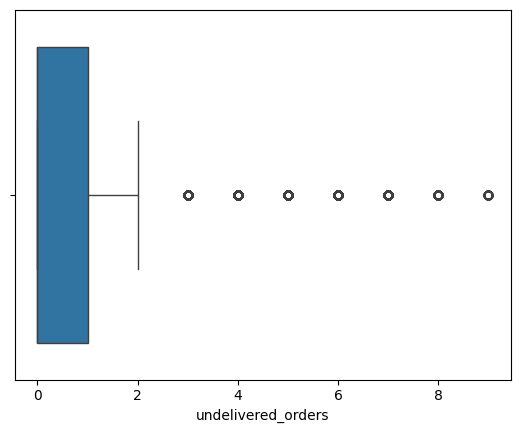

In [24]:
## Let's try to fill NULL values with RSI or Mean Imputation first

sns.boxplot(x=df['undelivered_orders'],)

In [25]:
percentile25 = df['undelivered_orders'].quantile(0.25)
percentile75 = df['undelivered_orders'].quantile(0.75)
IQR = percentile75 - percentile25
IQR

upp_limit = percentile75 + 1.5 * IQR
low_limit = percentile25 - 1.5 * IQR
print(upp_limit, low_limit)

2.5 -1.5


In [26]:
df[df['undelivered_orders']>upp_limit]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
628,2021-01-28 12:30:06,488254,2021-01-28 12:30:06,2021-01-28 12:30:47,2021-01-28 12:53:23,2021-01-28 13:10:36,24,1.479500,3.88,93.0,90.0,0,3.0,179.0,NaN,NaN,NaN,59.466667,NaT
629,2021-01-28 13:32:19,489585,2021-01-28 13:32:21,2021-01-28 13:32:35,2021-01-28 13:44:01,2021-01-28 13:56:39,24,1.342000,3.39,93.0,90.0,0,3.0,179.0,NaN,NaN,NaN,121.683333,NaT
630,2021-01-28 14:00:06,492821,2021-01-28 14:00:08,2021-01-28 14:02:36,2021-01-28 14:11:14,2021-01-28 14:23:09,24,1.267200,3.21,93.0,90.0,0,3.0,179.0,NaN,NaN,NaN,149.466667,NaT
631,2021-01-28 14:30:34,496347,2021-01-28 14:30:48,2021-01-28 14:31:04,2021-01-28 14:54:25,2021-01-28 15:05:21,24,1.986700,2.08,93.0,90.0,0,3.0,179.0,NaN,NaN,NaN,179.933333,NaT
632,2021-01-28 15:05:15,500320,2021-01-28 15:05:16,2021-01-28 15:05:27,2021-01-28 15:16:41,2021-01-28 15:39:03,24,0.580700,4.11,93.0,90.0,0,3.0,179.0,NaN,NaN,NaN,214.616667,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449650,2021-01-26 15:57:45,585103,2021-01-26 15:57:46,2021-01-26 15:58:38,2021-01-26 16:12:53,2021-01-26 16:22:25,21438,0.126038,1.50,51.0,48.0,0,3.0,59.0,NaN,NaN,NaN,100.283333,NaT
449739,2021-01-26 14:24:33,576418,2021-01-26 14:37:55,2021-01-26 14:38:09,2021-01-26 14:46:42,2021-01-26 15:17:20,21464,2.087800,4.80,85.0,82.0,0,3.0,547.0,auto,Reassignment Request from SE portal.,1.0,18.416667,NaT
449838,2021-01-26 15:06:07,580316,2021-01-26 15:06:10,2021-01-26 15:06:37,2021-01-26 15:16:51,2021-01-26 15:21:12,21505,0.765900,0.37,145.0,141.0,0,4.0,1224.0,NaN,NaN,NaN,26.550000,NaT
449839,2021-01-26 15:23:56,581934,2021-01-26 15:31:52,2021-01-26 15:32:10,2021-01-26 15:37:30,2021-01-26 15:50:32,21505,0.008534,3.31,145.0,141.0,0,4.0,1224.0,NaN,NaN,NaN,44.366667,NaT


In [27]:
df[df['undelivered_orders']<low_limit]

## As we can see there are a lot of rows above upper limit removing them or capping them will not be ideal
## The no of unique values are very less. I will be filling this feature values null with MODE Imputation.

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time


In [28]:
df['undelivered_orders'] = df['undelivered_orders'].fillna(df['undelivered_orders'].mode()[0])
## [0] is used here in case if more than 1 Mode/Frequent values are there, it will choose the first Mode value

**Alloted_Orders & Delivered_Orders NULL**

<Axes: xlabel='delivered_orders'>

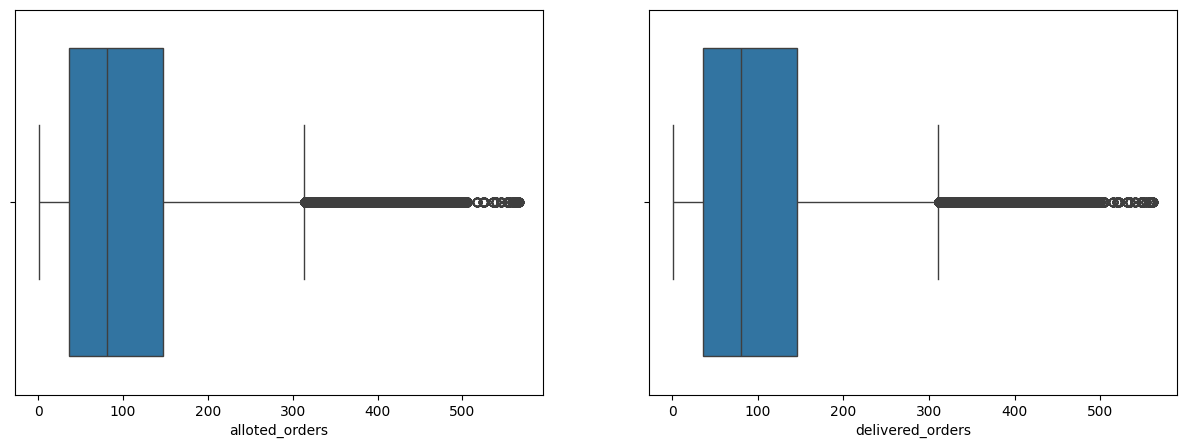

In [29]:
## Will Also see here if we can Use Mean, RSI or Mode or Median Imputation
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='alloted_orders', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='delivered_orders', data=df)

In [30]:
percentile25 = df['alloted_orders'].quantile(0.25)
percentile75 = df['alloted_orders'].quantile(0.75)
IQR = percentile75 - percentile25
IQR

upp_limit = percentile75 + 1.5 * IQR
low_limit = percentile25 - 1.5 * IQR
print(upp_limit, low_limit)

313.5 -130.5


In [31]:
df[df['alloted_orders']>upp_limit].alloted_orders.nunique()

197

In [32]:
df[df['alloted_orders']<low_limit].alloted_orders.count()

np.int64(0)

In [33]:
percentile25 = df['delivered_orders'].quantile(0.25)
percentile75 = df['delivered_orders'].quantile(0.75)
IQR = percentile75 - percentile25
IQR

upp_limit = percentile75 + 1.5 * IQR
low_limit = percentile25 - 1.5 * IQR
print(upp_limit, low_limit)

311.0 -129.0


In [34]:
df[df['delivered_orders']>upp_limit].alloted_orders.count()

np.int64(15991)

In [35]:
df[df['delivered_orders']>upp_limit].alloted_orders.count()

np.int64(15991)

In [36]:
### So the Number of Outliers are More in Both the Features. And these are not some corrupted data. There are great number of unique orders.
### We will use Median Imputation since RSI, Mean are outliers/skewness sensitive.

In [37]:
df['alloted_orders'] = df['alloted_orders'].fillna(df['alloted_orders'].median())
df['delivered_orders'] = df['delivered_orders'].fillna(df['delivered_orders'].median())

In [38]:
func(df)

,nullcount,count,unique
order_time,0,449947,252846
order_id,0,449947,449946
allot_time,0,449947,246850
accept_time,154,449793,254188
pickup_time,2406,447541,257105
delivered_time,5167,444780,257066
rider_id,0,449947,19500
first_mile_distance,0,449947,93731
last_mile_distance,0,449947,1331
alloted_orders,0,449947,510


**Reassignment_Method & Reassigned_Reason**

In [39]:
df.drop(df[df.reassignment_method.isnull() & df.reassignment_reason.notna()].index, inplace= True)

In [40]:
df[df['reassignment_method'].isnull()]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-27 08:47:15,524758,2021-01-27 08:51:01,2021-01-27 08:51:30,2021-01-27 08:59:18,2021-01-27 09:07:14,0,1.308600,0.08,29.0,28.0,0,1.0,8734.0,NaN,NaN,NaN,299.583333,NaT
1,2021-01-29 08:37:58,442759,2021-01-29 08:37:58,2021-01-29 08:39:57,2021-01-29 08:57:45,2021-01-29 09:00:23,0,1.347700,0.03,28.0,28.0,0,0.0,8734.0,NaN,NaN,NaN,245.266667,NaT
3,2021-02-01 14:31:33,339093,2021-02-01 14:31:34,2021-02-01 14:33:32,2021-02-01 14:53:07,2021-02-01 15:00:36,0,0.535600,1.01,26.0,25.0,0,1.0,8734.0,NaN,NaN,NaN,646.016667,NaT
5,2021-02-01 15:12:46,343414,2021-02-01 15:12:46,2021-02-01 15:13:51,2021-02-01 15:23:37,2021-02-01 15:31:29,0,0.148177,1.33,26.0,25.0,0,1.0,8734.0,NaN,NaN,NaN,687.233333,NaT
6,2021-02-04 08:57:50,207245,2021-02-04 08:57:51,2021-02-04 08:58:02,2021-02-04 09:03:38,2021-02-04 09:16:39,0,1.285700,3.63,26.0,25.0,0,1.0,8734.0,NaN,NaN,NaN,208.700000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449942,2021-01-26 17:39:11,593623,2021-01-26 18:29:55,2021-01-26 18:30:44,2021-01-26 18:32:13,NaT,21561,1.105300,2.31,1.0,81.0,1,0.0,213.0,NaN,NaN,NaN,19.433333,2021-01-26 19:16:29
449943,2021-01-26 17:49:23,594265,2021-01-26 17:50:08,2021-01-26 17:50:18,2021-01-26 18:31:32,2021-01-26 18:48:17,21563,1.513600,1.12,81.0,81.0,0,0.0,282.0,NaN,NaN,NaN,11.950000,NaT
449944,2021-01-26 17:54:25,594538,2021-01-26 17:54:26,2021-01-26 17:54:38,NaT,NaT,21564,0.171028,0.84,2.0,1.0,1,1.0,55.0,NaN,NaN,NaN,3.066667,2021-01-26 18:56:16
449945,2021-01-26 17:55:02,594591,2021-01-26 17:55:52,2021-01-26 17:56:11,2021-01-26 18:10:27,2021-01-26 18:32:39,21565,0.008342,4.62,1.0,1.0,0,0.0,31.0,NaN,NaN,NaN,2.300000,NaT


In [41]:
df['reassignment_method'] = df['reassignment_method'].fillna('Not_Reassigned')
df['reassignment_reason'] = df['reassignment_reason'].fillna('Not Reassigned')

In [42]:
func(df)

,nullcount,count,unique
order_time,0,449938,252841
order_id,0,449938,449937
allot_time,0,449938,246847
accept_time,153,449785,254186
pickup_time,2403,447535,257104
delivered_time,5164,444774,257063
rider_id,0,449938,19499
first_mile_distance,0,449938,93730
last_mile_distance,0,449938,1331
alloted_orders,0,449938,510


In [43]:
df['reassigned_order'].unique()

array([nan,  1.])

**Reassigned_Order**


In [44]:
## Here in this Case 1 showing Orders as Reassigned which are 13739. We shall fill NULL values with 0 showing Not Reassigned Orders
df[df['reassigned_order']==1].reassigned_order.count()

np.int64(13739)

In [45]:
df['reassigned_order'] = df['reassigned_order'].fillna(0)

In [46]:
func(df)

,nullcount,count,unique
order_time,0,449938,252841
order_id,0,449938,449937
allot_time,0,449938,246847
accept_time,153,449785,254186
pickup_time,2403,447535,257104
delivered_time,5164,444774,257063
rider_id,0,449938,19499
first_mile_distance,0,449938,93730
last_mile_distance,0,449938,1331
alloted_orders,0,449938,510


**Session Time**


In [47]:
df['rider_id'].nunique()

19499

In [48]:
print(df[df['session_time'].isnull()].rider_id.nunique())
print(df[df['session_time'].notna()].rider_id.nunique())

2834
19394


In [49]:
df = df[df['session_time'].notna()]

In [50]:
func(df)

,nullcount,count,unique
order_time,0,446267,251389
order_id,0,446267,446266
allot_time,0,446267,245435
accept_time,150,446117,252752
pickup_time,2323,443944,255710
delivered_time,5024,441243,255707
rider_id,0,446267,19394
first_mile_distance,0,446267,93371
last_mile_distance,0,446267,1329
alloted_orders,0,446267,510


# Duplicates


In [51]:
df.duplicated().sum()

np.int64(1)

In [52]:
df.order_id.duplicated().sum()

np.int64(1)

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
#df[df.duplicated(subset=['rider_id','pickup_time'], keep=False)]

**lifetime_order_count**


<Axes: xlabel='lifetime_order_count'>

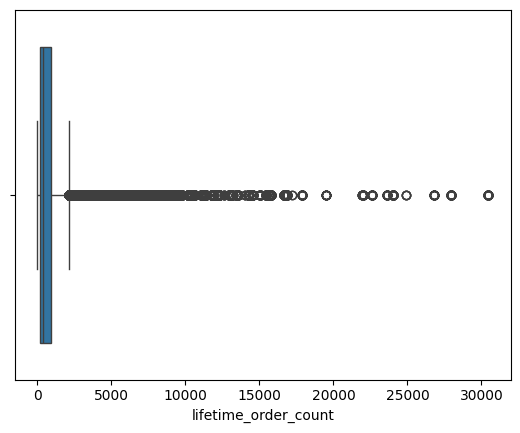

In [55]:
sns.boxplot(x=df['lifetime_order_count'])

In [56]:
percent25 = df['lifetime_order_count'].quantile(.25)
percent75 = df['lifetime_order_count'].quantile(.75)
IQR = percent75 - percent25
IQR

np.float64(785.0)

In [57]:
upp_limit = percent75 + 1.5 * IQR
low_limit = percent25 - 1.5 * IQR
print(upp_limit, low_limit)

2127.5 -1012.5


In [58]:
df[df['lifetime_order_count']<low_limit]

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time


In [59]:
df.head(2)

,order_time,order_id,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-27 08:47:15,524758,2021-01-27 08:51:01,2021-01-27 08:51:30,2021-01-27 08:59:18,2021-01-27 09:07:14,0,1.3086,0.08,29.0,28.0,0,1.0,8734.0,Not_Reassigned,Not Reassigned,0.0,299.583333,NaT
1,2021-01-29 08:37:58,442759,2021-01-29 08:37:58,2021-01-29 08:39:57,2021-01-29 08:57:45,2021-01-29 09:00:23,0,1.3477,0.03,28.0,28.0,0,0.0,8734.0,Not_Reassigned,Not Reassigned,0.0,245.266667,NaT


### 📝 Delivery Order Dataset - Column Descriptions

| # | Column Name | Data Type | Description |
| :--- | :--- | :--- | :--- |
| 0 | order_time | object | The precise **time** when the customer placed the order (e.g., 'HH:MM:SS'). |
| 1 | order_id | int64 | A **unique identifier** for each specific order. |
| 2 | order_date | object | The **date** on which the order was placed. |
| 3 | allot_time | object | The time when the order was **first assigned** to a delivery rider. |
| 4 | accept_time | object | The time when the assigned rider **accepted** the order. |
| 5 | pickup_time | object | The time when the rider **picked up** the order from the store/restaurant. |
| 6 | delivered_time | object | The final time when the order was successfully **delivered** to the customer. |
| 7 | rider_id | int64 | A **unique identifier** for the delivery executive/rider assigned to the order. |
| 8 | first_mile_distance | float64 | The distance (in km or miles) from the **store/restaurant to the delivery rider's location** at the time of allotment. |
| 9 | last_mile_distance | float64 | The distance (in km or miles) from the **store/restaurant to the customer's location**. This is the actual delivery distance. |
| 10 | alloted_orders | float64 | The total count of orders **allotted** to this specific rider *prior* to this current order during the ongoing session/period. |
| 11 | delivered_orders | float64 | The total count of orders **successfully delivered** by this specific rider *prior* to this current order. |
| 12 | cancelled | int64 | A **binary flag** (0 or 1) indicating if the order was ultimately **cancelled** (1 = Cancelled, 0 = Not Cancelled). |
| 13 | undelivered_orders | float64 | The total count of orders **unsuccessful/undelivered** by this specific rider *prior* to this current order. |
| 14 | lifetime_order_count | float64 | The rider's **total number of completed orders** across their entire history (lifetime). |
| 15 | reassignment_method | object | The **method** used for reassigning the order to a new rider (e.g., 'automatic', 'manual'). |
| 16 | reassignment_reason | object | The **reason** the order had to be reassigned (e.g., 'rider didn't accept', 'long waiting time'). |
| 17 | reassigned_order | float64 | A **binary flag** (0 or 1) indicating if the order was **reassigned** to a different rider. |
| 18 | session_time | float64 | The **time elapsed** (in minutes/seconds) since the rider started their delivery session/shift. |
| 19 | cancelled_time | object | The precise **time** when the order cancellation occurred. |

In [60]:
from datetime import datetime

In [61]:
def ff(x):
  if x=='-NaT' or x=='NaT':
    return None
  else:
    return datetime.strptime(x, '%H:%M:%S')

In [62]:
df['Order_Assign_Latency'] = (df['accept_time'] - df['allot_time'])
#df['Order_Assign_Latency'] = df['Order_Assign_Latency'].apply(lambda x: str(x).split(' ')[-1] if x.days >= 0 else '-' + str(pd.Timedelta('24h') - x).split(' ')[-1])

#df = df[~df['Order_Assign_Latency'].str.startswith('-')]
#df['Order_Assign_Latency'] = df['Order_Assign_Latency'].apply(lambda x: ff(x))

In [63]:

df['Order_Assign_Latency'].unique()

<TimedeltaArray>
[  '0 days 00:00:29',   '0 days 00:01:59',   '0 days 00:01:50',
   '0 days 00:01:58',   '0 days 00:00:06',   '0 days 00:01:05',
   '0 days 00:00:11',   '0 days 00:00:05',   '0 days 00:01:22',
   '0 days 00:01:06',
 ...
 '-1 days +22:51:08', '-1 days +23:02:09',   '0 days 00:14:40',
 '-1 days +23:59:40', '-1 days +23:26:58', '-1 days +23:22:40',
   '0 days 00:15:14', '-1 days +22:41:46', '-1 days +23:24:36',
 '-1 days +23:08:30']
Length: 924, dtype: timedelta64[ns]

In [64]:
df['Order_PickupLatency'] = df['pickup_time'] - df['accept_time']

In [65]:
df['Order_PickupLatency'].unique()

<TimedeltaArray>
['0 days 00:07:48', '0 days 00:17:48',               NaT, '0 days 00:19:35',
 '0 days 00:07:46', '0 days 00:09:46', '0 days 00:05:36', '0 days 00:11:50',
 '0 days 00:26:09', '0 days 00:09:14',
 ...
 '0 days 01:18:08', '1 days 10:48:25', '0 days 01:32:45', '0 days 01:17:50',
 '0 days 02:30:20', '0 days 01:33:52', '0 days 01:29:00', '0 days 01:04:57',
 '0 days 01:21:52', '0 days 01:15:31']
Length: 4169, dtype: timedelta64[ns]

In [66]:
df['Delivery_Time'] = df['delivered_time'] - df['pickup_time']
#df['Delivery_Time'] = df['Delivery_Time'].apply(lambda x: str(x).split(' ')[-1] if
                                                            #  x.days >= 0 else '-' + str(pd.Timedelta('24h') - x).split(' ')[-1])
#df['Delivery_Time'].unique()

#df['Delivery_Time'] = pd.to_timedelta(df['Delivery_Time'], errors='coerce')

In [67]:
df['Total_Delivery_Time'] = df['delivered_time'] - df['order_time']
#df['Total_Delivery_Time'] = df['Total_Delivery_Time'].apply(lambda x: str(x).split(' ')[-1] if
                                                        #      x.days >= 0 else '-' + str(pd.Timedelta('24h') - x).split(' ')[-1])
#df['Total_Delivery_Time'].unique()

In [68]:
df['Total_Delivery_Distance'] = df['last_mile_distance'] + df['first_mile_distance']

In [69]:
df['Delivery_Success_%'] = (df['delivered_orders']/df['alloted_orders'])*100

In [70]:
df1 = df.copy()

In [71]:
df1.drop(['accept_time','pickup_time','delivered_time','last_mile_distance','allot_time'], axis=1, inplace=True)

In [72]:
df1.head()

,order_time,order_id,rider_id,first_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,Order_Assign_Latency,Order_PickupLatency,Delivery_Time,Total_Delivery_Time,Total_Delivery_Distance,Delivery_Success_%
0,2021-01-27 08:47:15,524758,0,1.3086,29.0,28.0,0,1.0,8734.0,Not_Reassigned,Not Reassigned,0.0,299.583333,NaT,0 days 00:00:29,0 days 00:07:48,0 days 00:07:56,0 days 00:19:59,1.3886,96.551724
1,2021-01-29 08:37:58,442759,0,1.3477,28.0,28.0,0,0.0,8734.0,Not_Reassigned,Not Reassigned,0.0,245.266667,NaT,0 days 00:01:59,0 days 00:17:48,0 days 00:02:38,0 days 00:22:25,1.3777,100.000000
2,2021-01-29 08:38:07,442767,0,1.6314,28.0,28.0,1,0.0,8734.0,auto,Reassign,1.0,245.416667,2021-01-29 09:54:21,0 days 00:01:50,NaT,NaT,NaT,3.8514,100.000000
3,2021-02-01 14:31:33,339093,0,0.5356,26.0,25.0,0,1.0,8734.0,Not_Reassigned,Not Reassigned,0.0,646.016667,NaT,0 days 00:01:58,0 days 00:19:35,0 days 00:07:29,0 days 00:29:03,1.5456,96.153846
4,2021-02-01 14:54:31,341573,0,2.5956,26.0,25.0,0,1.0,8734.0,auto,Reassignment Request from SE portal.,1.0,668.983333,NaT,0 days 00:00:06,0 days 00:07:46,0 days 00:07:19,0 days 00:21:35,4.1556,96.153846


In [73]:
df1['Order_Assign_Latency_seconds'] = df1['Order_Assign_Latency'].dt.total_seconds()
df1['Order_PickupLatency_seconds'] = df1['Order_PickupLatency'].dt.total_seconds()
df1['Delivery_Time_seconds'] = df1['Delivery_Time'].dt.total_seconds()
df1['TotalDelivery_Time_seconds'] = df1['Total_Delivery_Time'].dt.total_seconds()

In [74]:
func(df1)

,nullcount,count,unique
order_time,0,446266,251389
order_id,0,446266,446266
rider_id,0,446266,19394
first_mile_distance,0,446266,93371
alloted_orders,0,446266,510
delivered_orders,0,446266,504
cancelled,0,446266,2
undelivered_orders,0,446266,10
lifetime_order_count,0,446266,2884
reassignment_method,0,446266,3


In [75]:
#  df1['Order_Assign_Latency_seconds'].fillna(0, inplace=True)
# df1['Order_PickupLatency_seconds'].fillna(0, inplace=True)
# df1['Delivery_Time_seconds'].fillna(0, inplace=True)
# df1['TotalDelivery_Time_seconds'].fillna(0, inplace=True)

In [76]:
df1.drop(['Order_Assign_Latency','Order_PickupLatency','Delivery_Time','Total_Delivery_Time'],inplace=True, axis=1)


**Dealing With Outliers**

In [77]:
df1.head()

,order_time,order_id,rider_id,first_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,Total_Delivery_Distance,Delivery_Success_%,Order_Assign_Latency_seconds,Order_PickupLatency_seconds,Delivery_Time_seconds,TotalDelivery_Time_seconds
0,2021-01-27 08:47:15,524758,0,1.3086,29.0,28.0,0,1.0,8734.0,Not_Reassigned,Not Reassigned,0.0,299.583333,NaT,1.3886,96.551724,29.0,468.0,476.0,1199.0
1,2021-01-29 08:37:58,442759,0,1.3477,28.0,28.0,0,0.0,8734.0,Not_Reassigned,Not Reassigned,0.0,245.266667,NaT,1.3777,100.000000,119.0,1068.0,158.0,1345.0
2,2021-01-29 08:38:07,442767,0,1.6314,28.0,28.0,1,0.0,8734.0,auto,Reassign,1.0,245.416667,2021-01-29 09:54:21,3.8514,100.000000,110.0,NaN,NaN,NaN
3,2021-02-01 14:31:33,339093,0,0.5356,26.0,25.0,0,1.0,8734.0,Not_Reassigned,Not Reassigned,0.0,646.016667,NaT,1.5456,96.153846,118.0,1175.0,449.0,1743.0
4,2021-02-01 14:54:31,341573,0,2.5956,26.0,25.0,0,1.0,8734.0,auto,Reassignment Request from SE portal.,1.0,668.983333,NaT,4.1556,96.153846,6.0,466.0,439.0,1295.0


In [78]:
# sns.boxplot(x='Order_Assign_Latency_seconds',data=df1)

In [79]:
quantile25 = df1['Order_Assign_Latency_seconds'].quantile(0.25)
quantile75 = df1['Order_Assign_Latency_seconds'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = quantile75 + 1.5 * IQR
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)
print(df1['Order_Assign_Latency_seconds'].max())

135.0    -57.0
930.0


In [80]:

print(df1[df1['Order_Assign_Latency_seconds']<=low_limit].Order_Assign_Latency_seconds.count())
print(df1[df1['Order_Assign_Latency_seconds']>upp_limit].Order_Assign_Latency_seconds.count())
print(df1[df1['Order_Assign_Latency_seconds']< 0].Delivery_Time_seconds.count())
df1= df1[df1['Order_Assign_Latency_seconds']>=0].reset_index(drop=True)


20
37676
1


In [81]:
# sns.boxplot(x='first_mile_distance',data=df1)

In [82]:
quantile25 = df1['first_mile_distance'].quantile(0.25)
quantile75 = df1['first_mile_distance'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = quantile75 + 1.5 * IQR
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

3.8172499999999996    -1.4295499999999997


In [83]:
print(df1[df1['first_mile_distance']<=low_limit].first_mile_distance.count())
print(df1[df1['first_mile_distance']>upp_limit].first_mile_distance.count())
df1= df1[df1['first_mile_distance']<=upp_limit].reset_index(drop=True)



0
993


In [84]:
# sns.boxplot(x='alloted_orders',data=df1)

In [85]:
quantile25 = df1['alloted_orders'].quantile(0.25)
quantile75 = df1['alloted_orders'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = quantile75 + 1.5 * IQR
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

305.5    -122.5


In [86]:
print(df1[df1['alloted_orders']<0].alloted_orders.count())
print(df1[df1['alloted_orders']>upp_limit].alloted_orders.count())
#df1= df1[df1['alloted_orders']<=upp_limit].reset_index(drop=True)

0
17560


In [87]:
quantile25 = df1['session_time'].quantile(0.25)
quantile75 = df1['session_time'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = quantile75 + 1.5 * IQR
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

665.6416666666667    -264.82499999999993


In [88]:
print(df1[df1['session_time']<0].session_time.count())
print(df1[df1['session_time']>upp_limit].session_time.count())
df1= df1[df1['session_time']<=upp_limit].reset_index(drop=True)


0
8126


In [89]:
quantile25 = df1['Total_Delivery_Distance'].quantile(0.25)
quantile75 = df1['Total_Delivery_Distance'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = quantile75 + 1.5 * IQR
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

10.198138654339274    -2.100097757232125


In [90]:
print(df1[df1['Total_Delivery_Distance']<=low_limit].Total_Delivery_Distance.count())
print(df1[df1['Total_Delivery_Distance']>upp_limit].Total_Delivery_Distance.count())
df1= df1[df1['Total_Delivery_Distance']<=upp_limit].reset_index(drop=True)


0
3925


In [91]:
df1 = df1[df1['Total_Delivery_Distance']>=0]

In [92]:
df1.cancelled.value_counts()

,count
cancelled,
0,428381
1,4669


In [93]:
# sns.boxplot(x='Order_PickupLatency_seconds', data=df1)

In [94]:
completed_orders = df1[df1['cancelled'] == 0]

# 2. Calculate Quantiles on the filtered data
quantile25 = completed_orders['Order_PickupLatency_seconds'].quantile(0.25)
quantile75 = completed_orders['Order_PickupLatency_seconds'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = (quantile75 + 1.5 * IQR) + 602 ##Taking 1 Hour as Upper Limit
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

print(df1[df1['Order_PickupLatency_seconds']<0].Order_PickupLatency_seconds.count())

print(df1[df1['Order_PickupLatency_seconds']>upp_limit].Order_PickupLatency_seconds.count())

# df1= df1[(df1['Order_PickupLatency_seconds']<=upp_limit) | (df1['Order_PickupLatency_seconds'].isna())].reset_index(drop=True)


2476.5    -321.5
9
4767


In [95]:
# df1 =df1[df1['Order_PickupLatency_seconds']>=low_limit].reset_index(drop=True)

In [96]:
df1.cancelled.value_counts()

,count
cancelled,
0,428381
1,4669


In [97]:
completed_orders = df1[df1['cancelled'] == 0]

# 2. Calculate Quantiles on the filtered data
quantile25 = completed_orders['Delivery_Time_seconds'].quantile(0.25)
quantile75 = completed_orders['Delivery_Time_seconds'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = (quantile75 + 1.5 * IQR) + 1002 ##Taking 1 hour a Upp Limit
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

print(df1[df1['Delivery_Time_seconds']>upp_limit].Delivery_Time_seconds.count())
print(df1[df1['Delivery_Time_seconds']<=low_limit].Delivery_Time_seconds.count())
df1= df1[(df1['Delivery_Time_seconds']<=upp_limit) | (df1['Delivery_Time_seconds'].isna())].reset_index(drop=True)


3000.5    -285.5
3934
0


In [98]:
df1.TotalDelivery_Time_seconds.isnull().sum()

np.int64(4669)

In [99]:
completed_orders = df1[df1['cancelled'] == 0]

# 2. Calculate Quantiles on the filtered data
quantile25 = completed_orders['TotalDelivery_Time_seconds'].quantile(0.25)
quantile75 = completed_orders['TotalDelivery_Time_seconds'].quantile(0.75)
IQR = quantile75 - quantile25
IQR

upp_limit = (quantile75 + 1.5 * IQR)
low_limit = quantile25 - 1.5 * IQR
print(upp_limit, '  ',low_limit)

print(df1[df1['TotalDelivery_Time_seconds']>upp_limit].Delivery_Time_seconds.count())
print(df1[df1['TotalDelivery_Time_seconds']<=low_limit].Delivery_Time_seconds.count())
df1= df1[(df1['TotalDelivery_Time_seconds']<=upp_limit) | (df1['TotalDelivery_Time_seconds'].isna())].reset_index(drop=True)


3564.5    24.5
11094
0


In [100]:
func(df1)

,nullcount,count,unique
order_time,0,418022,242886
order_id,0,418022,418022
rider_id,0,418022,19227
first_mile_distance,0,418022,88997
alloted_orders,0,418022,510
delivered_orders,0,418022,504
cancelled,0,418022,2
undelivered_orders,0,418022,10
lifetime_order_count,0,418022,2880
reassignment_method,0,418022,3


##### We have removed Outliers from Order_Assign_Latency_seconds, first_mile_distance,session_time,Total_Delivery_Distance,Delivery_Time_seconds,TotalDelivery_Time_seconds

# EDA Exploratory Data Analysis

In [102]:
df1.columns

Index(['order_time', 'order_id', 'rider_id', 'first_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time',
       'Total_Delivery_Distance', 'Delivery_Success_%',
       'Order_Assign_Latency_seconds', 'Order_PickupLatency_seconds',
       'Delivery_Time_seconds', 'TotalDelivery_Time_seconds'],
      dtype='object')

In [109]:
df1[df1['Order_PickupLatency_seconds']==df1['Order_PickupLatency_seconds'].max()]
df1.drop(index=[415951,415950], inplace=True)  ##Here dropping the extreme values for Pickup Latency in Seconds
df1[df1['Order_PickupLatency_seconds']==df1['Order_PickupLatency_seconds'].max()]

,order_time,order_id,rider_id,first_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,Total_Delivery_Distance,Delivery_Success_%,Order_Assign_Latency_seconds,Order_PickupLatency_seconds,Delivery_Time_seconds,TotalDelivery_Time_seconds
415948,2021-01-30 14:22:12,419190,7319,2.2709,81.0,81.0,1,0.0,421.0,Not_Reassigned,Not Reassigned,0.0,47.0,2021-01-30 16:00:36,4.6409,100.0,55.0,5491.0,NaN,NaN


In [121]:
negative= list(df1[df1['Order_PickupLatency_seconds']<0].Order_PickupLatency_seconds.index)
df1.drop(index= negative, inplace=True) ##Here dropping the negative values for Pickup Latency in Seconds

***What is the Effect of  Total Delivery Distance on Order Pickup latency and Total Delivery Time of Riders?**

In [110]:
df1 =df1.sort_values('Order_PickupLatency_seconds', ascending = True).reset_index(drop=True)

Text(0.5, 1.0, 'Order Delivery Distance vs Time Features')

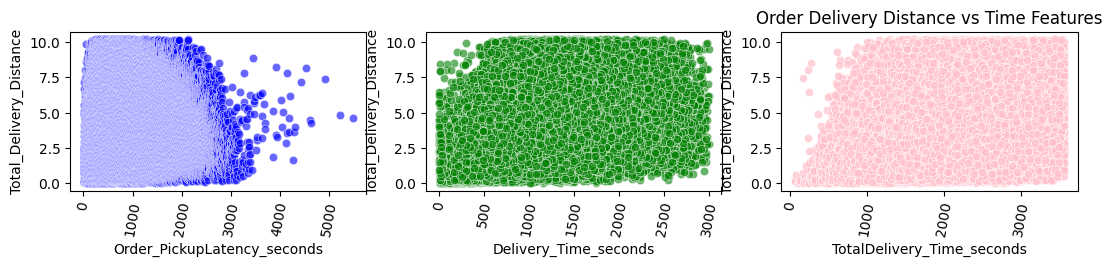

In [122]:
plt.figure(figsize=(13,7))
plt.subplot(3,3,1)
sns.scatterplot(y='Total_Delivery_Distance', x='Order_PickupLatency_seconds',data=df1, color='blue',alpha=0.6)
plt.xticks(rotation=80)
plt.subplot(3,3,2)
sns.scatterplot(y='Total_Delivery_Distance', x='Delivery_Time_seconds',data=df1,alpha=0.6,color='green')
plt.xticks(rotation=80)
plt.subplot(3,3,3)
sns.scatterplot(y='Total_Delivery_Distance', x='TotalDelivery_Time_seconds',data=df1, color='pink',alpha=0.7)
plt.xticks(rotation=80)
plt.title('Order Delivery Distance vs Time Features')

**Insight:**
- There is no relation of Total Delivery Distance with:
- Order Pickup Wait Time
- Order Delivery Time
- Order Total Delivery Time (including FirstMile Distance)


**Does Order Assign Latency or Order Pickup Latency or Total Delivery Time changes with The Day of Week and does alloted/delivered orders effect these timings too?**

In [123]:
df1['order_weekday'] = df1['order_time'].dt.day_name()

In [124]:
def deed(x):
  if x <=150:
    return 'Less'
  if x >150 and x<=310:
    return 'Medium'
  if x >310:
    return 'Lot'

df1['alloted_orders_char'] = df1['alloted_orders'].apply(lambda x: deed(x))

In [125]:
df1.sort_values('Order_Assign_Latency_seconds',ascending=True,inplace=True)
df1.drop(index=[277210, 383743], inplace=True)

Text(0.5, 1.0, 'Order Assign Latency via Weekday & Week Wise')

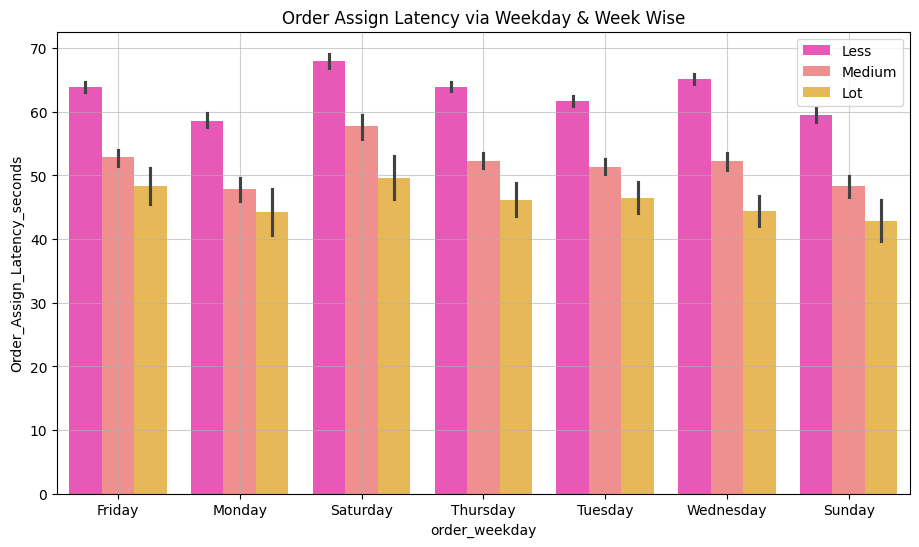

In [126]:
plt.figure(figsize=(11,6))
sns.barplot(x='order_weekday',y='Order_Assign_Latency_seconds',data=df1, palette='spring',hue='alloted_orders_char')
plt.legend()
plt.grid(alpha=0.6)
plt.title('Order Assign Latency via Weekday & Week Wise')

**Order Pickup Time**

Text(0.5, 1.0, '"OrderPickup Latency Weekday wise')

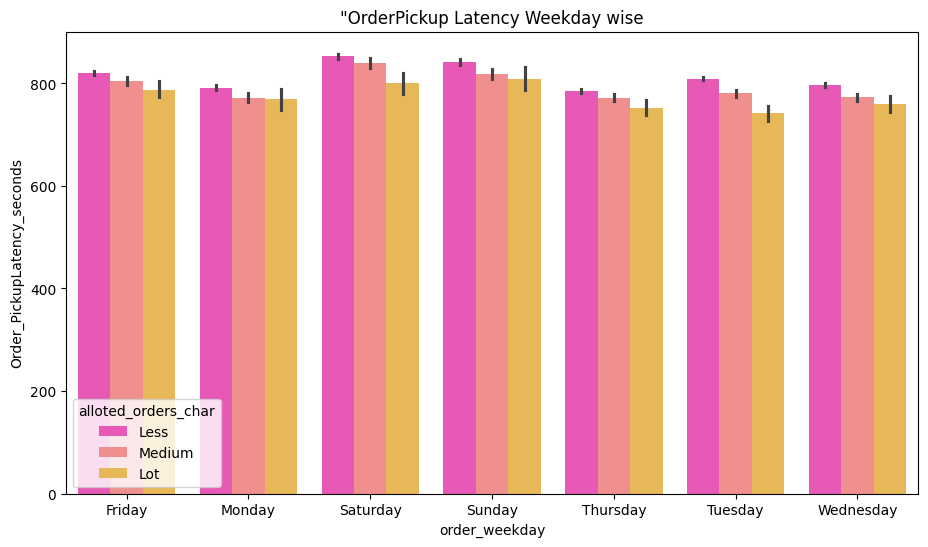

In [127]:
plt.figure(figsize=(11,6))
sns.barplot(x='order_weekday',y='Order_PickupLatency_seconds',data=df1.sort_values('order_weekday'), palette='spring',hue='alloted_orders_char')
plt.title('"OrderPickup Latency Weekday wise')

**Total Delivery Time**

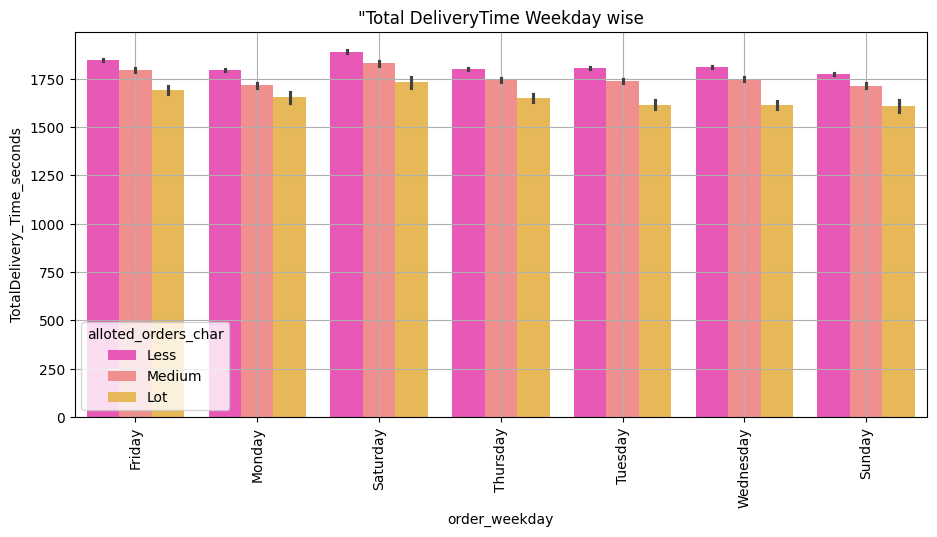

In [128]:
plt.figure(figsize=(11,5))
sns.barplot(x='order_weekday',y='TotalDelivery_Time_seconds',data=df1, palette='spring',hue='alloted_orders_char')
plt.xticks(rotation=90)
plt.title('"Total DeliveryTime Weekday wise')
plt.grid()

 - Order Assign Latency is a more on Wednesday, Thursday, Friday and Saturday.
- Order Pickup Latency Time is More on Friday, Saturday and Sunday
- Delivery Time is Most on Friday & Saturday.
- While Delivery Time is least on Sundays.

**So Yes Assign Latency,Pickup Latency and Delivery Time are effected by Weekdays**


-------
- Riders having Less Alloted Orders have higher Assign Latency and Riders having High Alloted Orders have low Assign Latency
- Riders having Less Alloted Orders, have more Pickup Latency
- Riders having less Orders Alloted, have more Total Delivery Time.
---------
**It Means that Riders taking More Orders are working efficiently by assigning, pickup and delivering orders faster**





**It Can Direct to Riders having less interest in the job having less orders delivering orders late and maybe it lead to leave the job sooner or later**

#### **What is the ration of Order getting Cancelled or Delivered**?

In [132]:
df1['cancelled'].value_counts()

,count
cancelled,
0,413350
1,4657


([<matplotlib.patches.Wedge at 0x7a2058855100>,
 [Text(-1.0993263096598485, 0.03849240041435951, 'Not Cancelled (0)'),
  Text(1.1992650687544983, -0.04199160469985153, 'Cancelled (1)')],
 [Text(-0.5996325325417354, 0.02099585477146882, '98.9%'),
  Text(0.6995712901067905, -0.02449510274158006, '1.1%')])

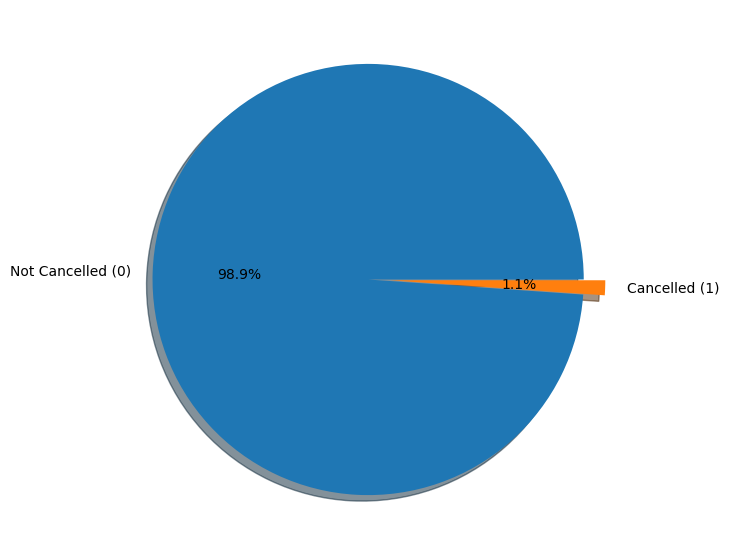

In [131]:
counts = df1['cancelled'].value_counts().sort_index(ascending=True)

# 2. Define parameters
sizes = counts.values
labels = ['Not Cancelled (0)', 'Cancelled (1)']
explode = (0, 0.1)

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,

)

**Insight:**
- 98.9% - Delivered Orders
- 1.1% - Cancelled Orders

([<matplotlib.patches.Wedge at 0x7a205de11820>,
 [Text(-0.6239244348703082, -0.9059350415850833, 'Not Reassigned (0)'),
  Text(0.68064451601364, 0.9882929944204594, 'Reassigned (1)')],
 [Text(-0.34032241902016813, -0.4941463863191363, '97.5%'),
  Text(0.39704263434128995, 0.5765042467452679, '2.5%')])

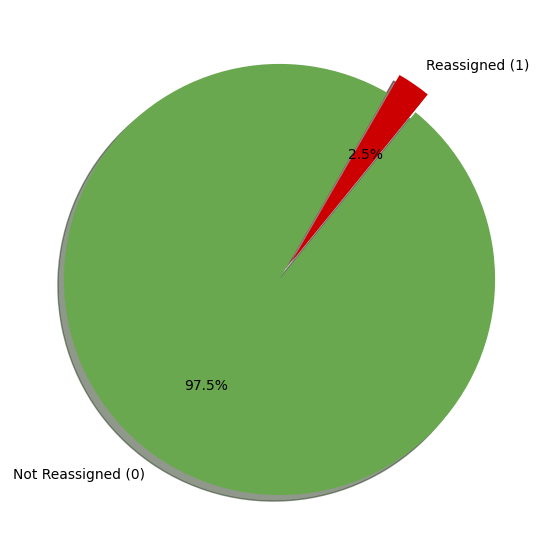

In [133]:
counts = df1['reassigned_order'].value_counts().sort_index(ascending=True)

# 2. Define parameters
sizes = counts.values
labels = ['Not Reassigned (0)', 'Reassigned (1)']
explode = (0, 0.1)

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,colors = ['#6aa84f', '#cc0000'],
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle =60

)

**Insight:**
- 97.5% - Not Reassigned Orders
- 2.5% - Reassigned Orders

In [134]:
df1.columns

Index(['order_time', 'order_id', 'rider_id', 'first_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time',
       'Total_Delivery_Distance', 'Delivery_Success_%',
       'Order_Assign_Latency_seconds', 'Order_PickupLatency_seconds',
       'Delivery_Time_seconds', 'TotalDelivery_Time_seconds', 'order_weekday',
       'alloted_orders_char'],
      dtype='object')

### **Calculate the percentage of late deliveries?**

In [135]:
average_totaldeliverytime=round(float(df1['TotalDelivery_Time_seconds'].sum() / df1.TotalDelivery_Time_seconds.count()),2)
average_totaldeliverytime

1800.23

In [136]:
df1['TotalDelivery_Time_seconds'].max()

3564.0

In [143]:
def late_delivery(x):
  if x >= average_totaldeliverytime+1200:
    return "Yes"
  else:
    return 'No'

In [144]:
# df1[df1['TotalDelivery_Time_seconds']>=average_totaldeliverytime+1200]
df1['LateDelivery'] = df1['TotalDelivery_Time_seconds'].apply(lambda x: late_delivery(x))

# Let's consider order deliveries above 50 minutes as late deliveries

([<matplotlib.patches.Wedge at 0x7a205dc476e0>,
 [Text(-1.1877809894621423, 0.17081077563296249, 'No'),
  Text(1.088799328689995, -0.1565759299643986, 'Yes')],
 [Text(-0.6928722438529163, 0.0996396191192281, '95.5%'),
  Text(0.5938905429218154, -0.08540505270785377, '4.5%')])

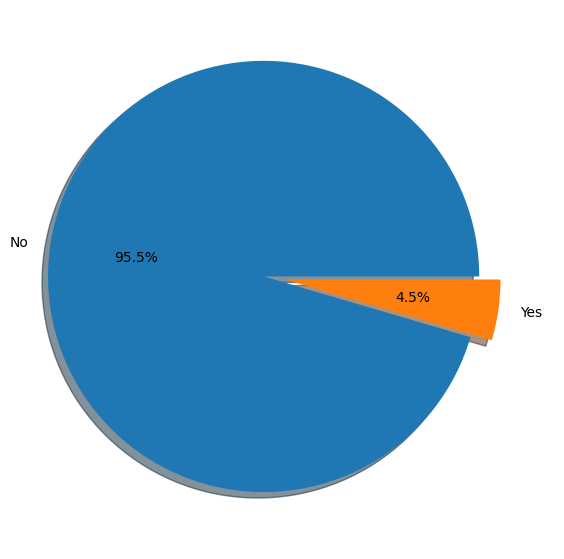

In [145]:
plt.figure(figsize=(7,7))
labell = list(df1['LateDelivery'].unique())
sizes = df1['LateDelivery'].value_counts().sort_index().values

plt.pie(sizes, labels= labell, shadow=True, explode=[0.1, 0.0], autopct='%1.1f%%')

**Insight**

- So our Data is having 04.5% of Late Deliveries from Riders and 95.5% of Deliveries on Time considering 50 minutes as standard Delivery Time for Riders


### **Do riders with a higher lifetime_order_count have shorter Delivery Times (transit time) compared to newer riders?**

Text(0.5, 1.0, 'Delivery Speed by Experience Level')

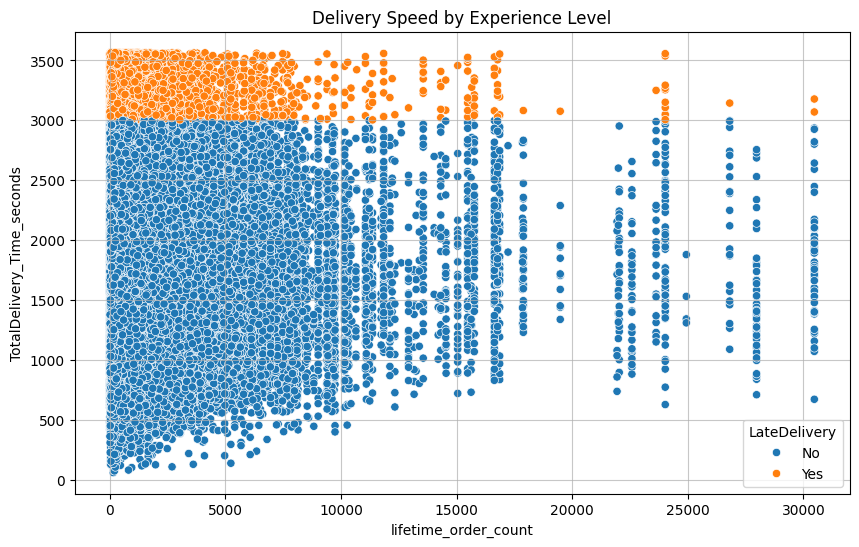

In [146]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='lifetime_order_count', y='TotalDelivery_Time_seconds',hue='LateDelivery')
plt.grid(alpha=0.7)
plt.title('Delivery Speed by Experience Level')

- for drivers with a low lifetime order count (near 0), the minimum delivery time is very low (almost 0). However, as the lifetime order count increases, the minimum possible delivery time rises.

**Insight: Highly experienced drivers (high order count) seem to have a higher "minimum" delivery time. This could mean experienced drivers are assigned longer-distance routes**

- Most of our data consists of "newer" drivers. As you move to the right (20k+ orders), the data thins out significantly.

#### **Is there a relationship between the first_mile_distance (distance from rider to store) and the likelihood of the rider cancelling the order or taking longer to accept?**

In [147]:
df1=df1[df1['delivered_orders']<=df1['alloted_orders']] ##This is false Data. Delivered Orders can never be greater than alloted orders for the session time

In [148]:
df1['acceptancerate']= round((df1['delivered_orders']/df1['alloted_orders']),2) * 100
df1['acceptancerate'].unique()

array([100.,  99.,  97.,  94.,  96.,  98.,  95.,  92.,  93.,  88.,  50.,
        91.,  67.,  89.,  80.,  86.,  81.,  83.,  85.,  75.,  78.,  90.,
        82.,  79.,  87.,  84.,  73.,  70.,  71.,  64.,  25.,  33.,  40.,
        60.,  62.,  17.,  57.,  43.])

In [149]:
a=df1[df1['cancelled']==1]
b=df1[df1['cancelled']==0]
#b.count()

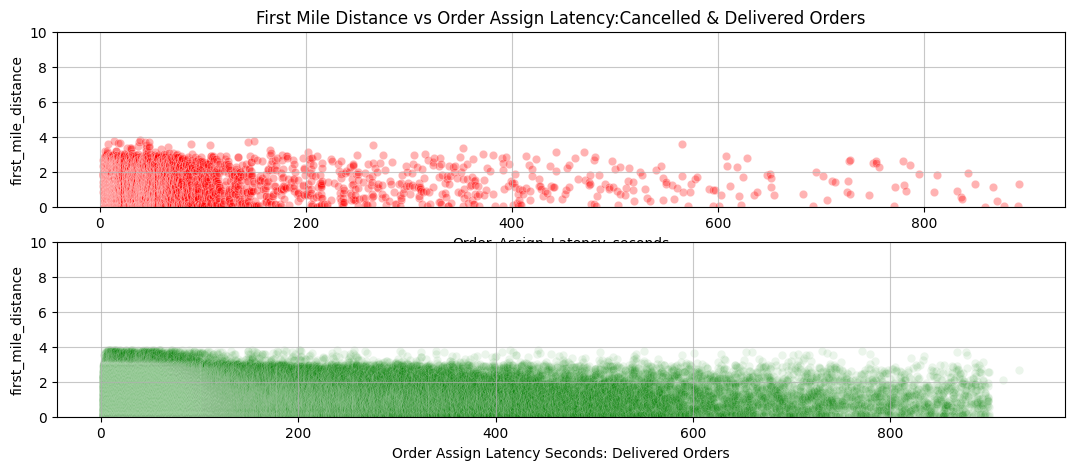

In [151]:

plt.figure(figsize=(13,5))
plt.subplot(2,1,1)
ax1= plt.gca()
sns.scatterplot(y='first_mile_distance',x='Order_Assign_Latency_seconds',data=a, color='red',alpha=0.3)
ax1.set_ylim(0,10)
plt.grid(alpha=0.7)
plt.title('First Mile Distance vs Order Assign Latency:Cancelled & Delivered Orders')
plt.subplot(2,1,2)
ax2 = plt.gca()
sns.scatterplot(y='first_mile_distance',x='Order_Assign_Latency_seconds',data=b, color='green',alpha=0.08)
ax2.set_ylim(0,10)
plt.xlabel('Order Assign Latency Seconds: Delivered Orders')
plt.grid(alpha=0.7)
# plt.title('First Mile Distance vs Order Assign Latency:Cancelled & Delivered Orders')
#plt.legend(labels=['Cancelled', 'Delivered'])

- There is no Specific relation of First Mile Distance with the order getting late assigned

<Axes: xlabel='cancelled', ylabel='first_mile_distance'>

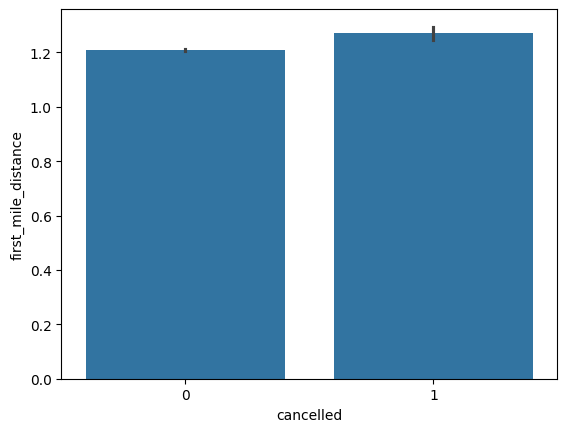

In [152]:
sns.barplot(y='first_mile_distance', x='cancelled', data=df1)

**Insight:**
- So, yes there is relation of First Mile Distance with the order getting cancelled or delivered.
- The More the First Mile Distance will be, more will be the Probability of Order being Cancelled

#### **Session Length and Performance: How does the rider's session_time (time into their shift) correlate with:**
- Their acceptance rate.
- Their average delivery speed.

Text(0.5, 1.0, 'Session Time vs Acceptance Rate')

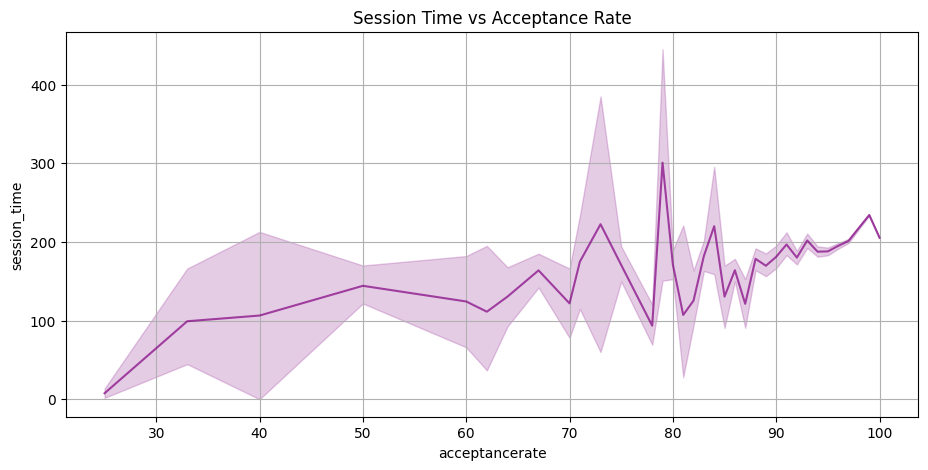

In [154]:
plt.figure(figsize=(11,5))
#ax2 = plt.gca()
sns.lineplot(y='session_time',x='acceptancerate',data=b, color='purple', alpha=0.7)
plt.grid()
plt.title('Session Time vs Acceptance Rate')


**Insight**
- Yes We can see The Acceptance Rate of Riders Increasing for Orders as the session time increases for Riders.
- less session_time: less acceptance_rate
- more session_time : more acceptance_rate

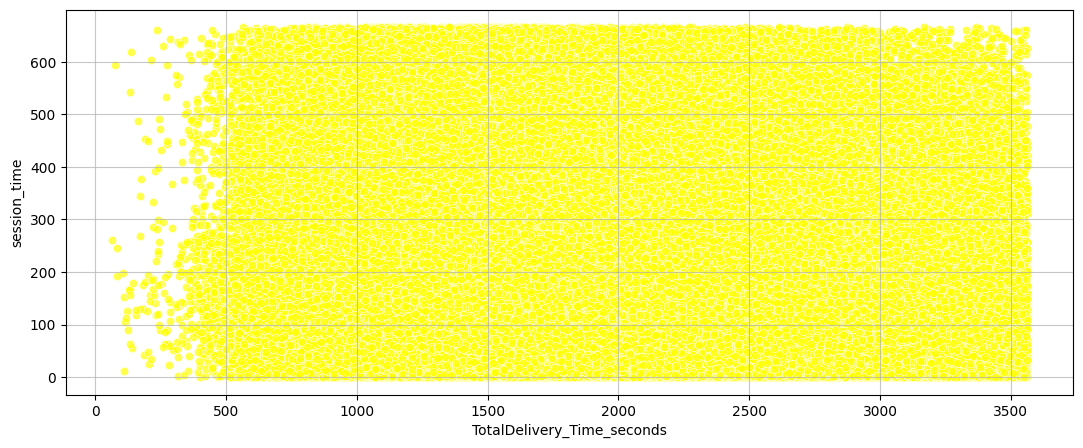

In [155]:
plt.figure(figsize=(13,5))
#ax2 = plt.gca()
sns.scatterplot(y='session_time',x='TotalDelivery_Time_seconds',data=b, color='yellow', alpha=0.7)
#ax2.set_ylim(0,10)
plt.grid(alpha=0.7)
#plt.legend(labels=['Cancelled', 'Delivered'])

- There is no Relation of Session Time of Riders with The Total Delivery Speed/time they are taking to deliver the orders.

#### **Reassignment Root Causes: For reassigned orders (reassigned_order = 1), what are the most frequent reassignment_reason and is the reassignment_method (manual vs. automatic) more effective?**

In [156]:
df1['reassignment_reason'].mask(df1['reassignment_reason']=='Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','Auto Reassignment_NoAction',inplace=True)
a = df1[df1['reassignment_reason'] !='Not Reassigned']

In [157]:
df1.first_mile_distance.min()

0.000134258785931

([<matplotlib.patches.Wedge at 0x7a205a6b8830>,
 [Text(-0.16316956065559177, 1.1888547827533276, 'Auto Reassignment_NoAction'),
  Text(-0.9809664119079472, -0.4976996069000336, 'Reassign'),
  Text(0.3923894204773303, -1.1340328666742712, 'Reassignment Request from SE portal.')],
 [Text(-0.09518224371576187, 0.6934986232727742, '54.3%'),
  Text(-0.5350725883134256, -0.27147251285456375, '6.3%'),
  Text(0.22889382861177596, -0.661519172226658, '39.4%')])

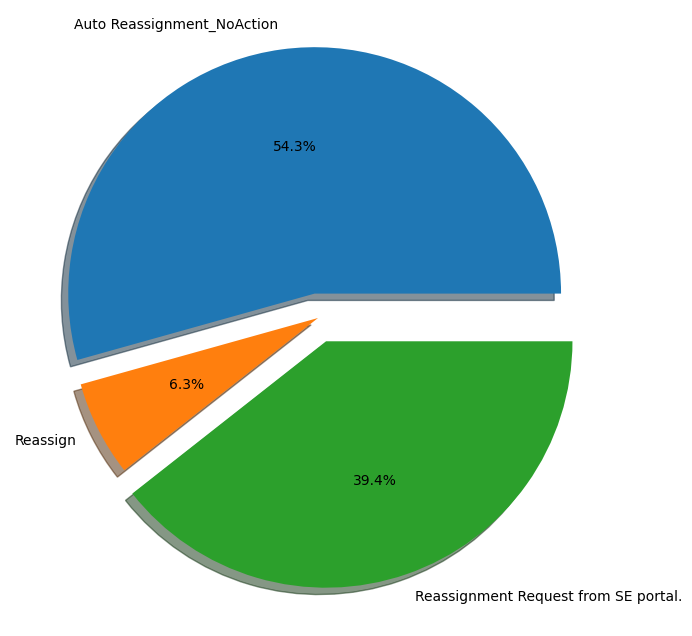

In [158]:
plt.figure(figsize=(9,8))
sizes=a['reassignment_reason'].value_counts().sort_index().values
explode =[0.1,0.0,0.1]
labels = a['reassignment_reason'].value_counts().sort_index().index
plt.pie(sizes,explode=explode,labels=labels, shadow=True , autopct='%1.1f%%')

In [159]:
a.reassignment_method.unique()

array(['auto', 'manual'], dtype=object)

([<matplotlib.patches.Wedge at 0x7a205daa4b00>,
 [Text(-1.197482925775478, 0.07768296129912441, 'auto'),
  Text(1.0976926542308147, -0.07120980864817184, 'manual')],
 [Text(-0.6985317067023621, 0.045315060757822566, '97.9%'),
  Text(0.5987414477622626, -0.038841713808093724, '2.1%')])

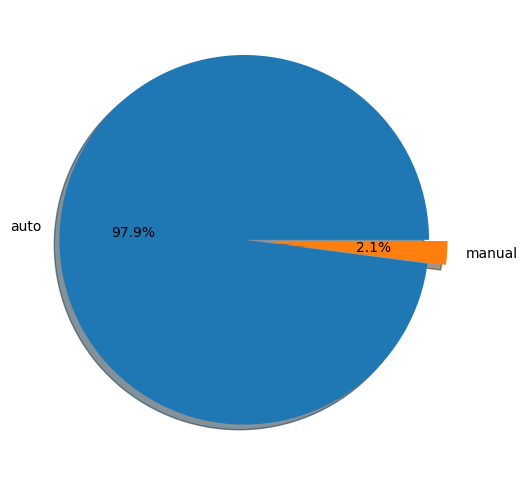

In [160]:
plt.figure(figsize=(7,6))
sizes=a['reassignment_method'].value_counts().sort_index().values
explode =[0.1,0.0]
labels = a['reassignment_method'].value_counts().sort_index().index
plt.pie(sizes,explode=explode,labels=labels, shadow=True ,autopct='%1.1f%%')

**Insight**
- Most Frequent Reassignment Reason are No Action taken by Riders Orders that were Auto Reassigned to new Riders
- The Most Used Method for Reassigning is Automatic.
##### Since the Reassignment Reason is also No Action which leads to Automatic Reassignment of Order

### **Cancellation Drivers: What is the most common reason for an order to be cancelled? Is a long Order Preparation/Waiting Time a major driver of customer cancellations?**

<Axes: xlabel='cancelled', ylabel='Order_PickupLatency_seconds'>

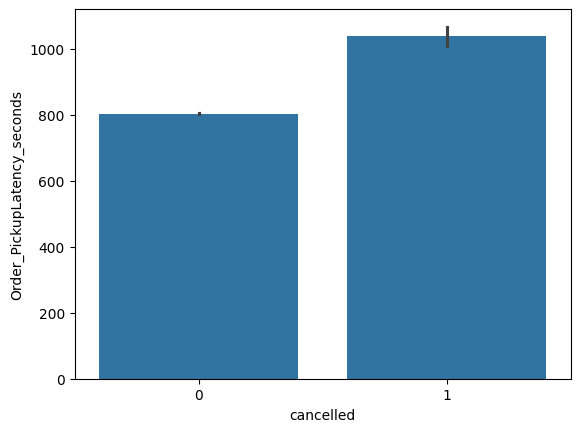

In [161]:
sns.barplot(y='Order_PickupLatency_seconds',x='cancelled',data=df1)

**Insight:**

 Yes Order Pickup Latency is also a major reason for Cancellation of Order Other than First Mile Distance

In [162]:
def deed(x):
  if x <=150:
    return 'Less'
  if x >150 and x<=310:
    return 'Medium'
  if x >310:
    return 'Lot'

df1['alloted_orders_char'] = df1['alloted_orders'].apply(lambda x: deed(x))

In [163]:
def orhour(x):
  if x >4 and x<=12:
    return 'Morning'
  if x >12 and x<=17:
    return 'Afternoon'
  if x>17 and x<=21:
    return 'Evening'
  else:
    return 'Night'

In [164]:
df1['order_hour'] = df1.order_time.dt.hour
df1['order_hour'] = df1['order_hour'].apply(lambda x: orhour(x))

In [165]:
cancelled_orders = df1[df1['cancelled']==1]

Text(0.5, 1.0, 'Cancelled Order Count Hour Wise')

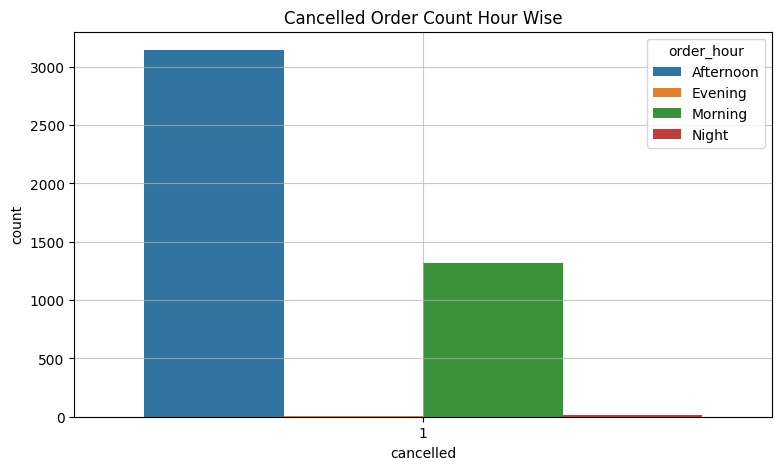

In [166]:
plt.figure(figsize=(9,5))
sns.countplot(x='cancelled', hue='order_hour',data=cancelled_orders.sort_values('order_hour'),legend=True)
plt.grid(alpha=0.7)
plt.title('Cancelled Order Count Hour Wise')

Text(0.5, 1.0, 'Cancelled Order Count Hour Wise')

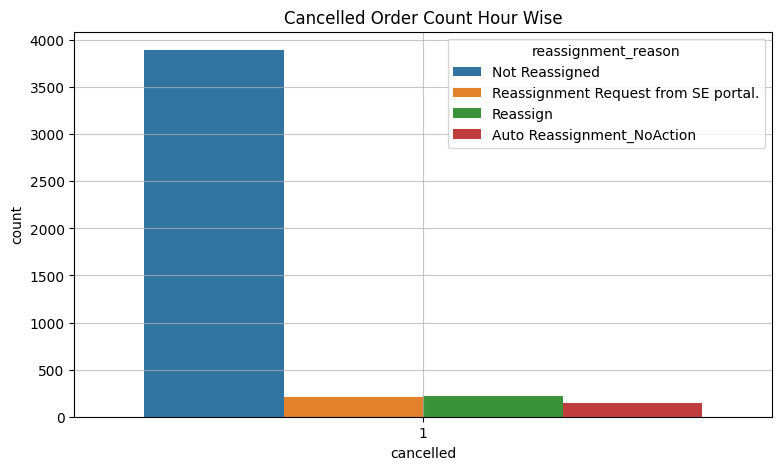

In [167]:
plt.figure(figsize=(9,5))
sns.countplot(x='cancelled', hue='reassignment_reason',data=cancelled_orders,legend=True)
plt.grid(alpha=0.7)
plt.title('Cancelled Order Count Hour Wise')

Text(0.5, 1.0, 'Cancelled Order Count AllotedOrder Wise')

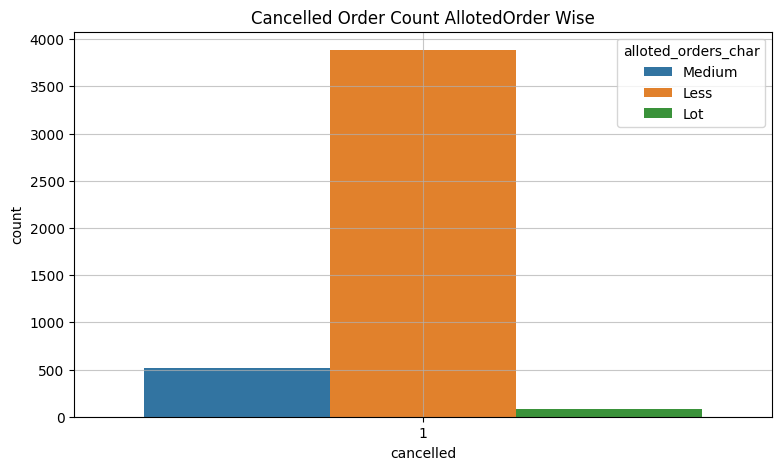

In [168]:
plt.figure(figsize=(9,5))
sns.countplot(x='cancelled', hue='alloted_orders_char',data=cancelled_orders,legend=True)
plt.grid(alpha=0.7)
plt.title('Cancelled Order Count AllotedOrder Wise')

**Insight:**

- Most Cancelled Orders are happening at Afternoon time. It can be due to traffic in that location or maybe riders getting less payment for order at that point of day.
- One Other Major Reason for ORder Cancellation is Order Not Getting Reassigned once an Rider left the delivery.
- Most Cancelled Orders were done by riders having low Alloted Orders, which can showcase their uninterest in current job.

In [175]:
df1.columns

Index(['order_time', 'order_id', 'rider_id', 'first_mile_distance',
       'alloted_orders', 'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled_time',
       'Total_Delivery_Distance', 'Delivery_Success_%',
       'Order_Assign_Latency_seconds', 'Order_PickupLatency_seconds',
       'Delivery_Time_seconds', 'TotalDelivery_Time_seconds', 'order_weekday',
       'alloted_orders_char', 'LateDelivery', 'acceptancerate', 'order_hour',
       'Delivery_Speed'],
      dtype='object')

#### **Is there a pattern in rider behavior (e.g., low delivered_orders history, long Rider Assignment Latency) that makes an order more likely to require reassignment?**

Text(0.5, 1.0, 'Reassigned Orders:Rider Assign Latency vs Lifetime Order Count')

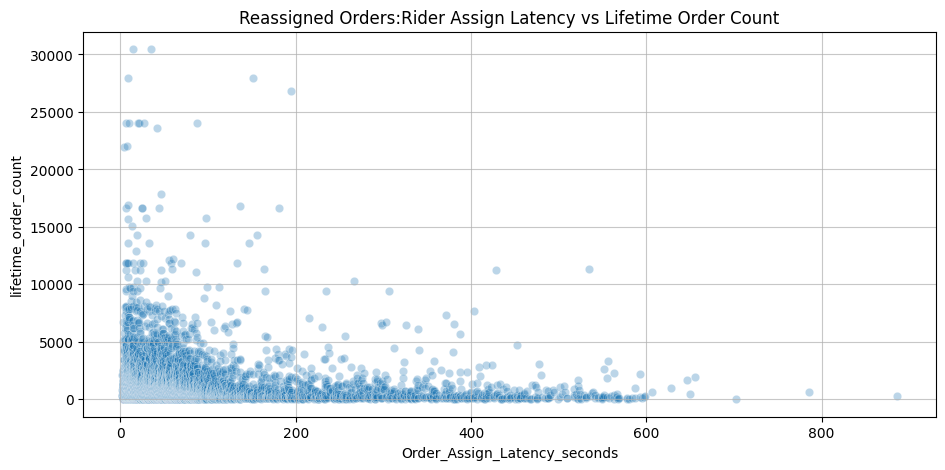

In [178]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='Order_Assign_Latency_seconds',y='lifetime_order_count', data=df1[df1['reassigned_order']==1],alpha=0.3)
# sns.scatterplot(x='Order_Assign_Latency_seconds',y='lifetime_order_count', data=df1,alpha=0.3)
plt.grid(alpha=0.7)
plt.title('Reassigned Orders:Rider Assign Latency vs Lifetime Order Count')



**Insight:**
- First we have relation of Lifetime Order Count with Order Assign Latency.
- High Order Count : Less Order Assign Latency
- Low Order Count: High Order Assign Latency
------
**for the Reassigned orders,**
- We can see more distribution over Less Lifetime Order count.
- Most Reassigned Orders are done by Riders having less Past Order count.
- Order Assign Latency is less and high both for many Reassigned Orders.

### **Delivery Efficiency per Distance:** Calculate **Average Speed** (Distance / Time) for the Total Delivery Distance. How does this average speed change based on time of day (traffic periods)?

In [170]:
def speed(x):
  if x < 40:
    return '0-40kmph'
  if x>=40 and x <80:
    return '40-80kmph'
  if x>=80 and x<120:
    return '80-120kmph'
  if x>=120 and x<160:
    return '120-160kmph'

In [171]:
df1['Delivery_Speed'] = round(df1['Total_Delivery_Distance']/(df1['TotalDelivery_Time_seconds']/(60*60)),1)
print(df1['Delivery_Speed'].min())
# df1['Delivery_Speed_char'] = df1['Delivery_Speed'].apply(lambda x: speed(x))

0.1


Text(0, 0.5, 'Delivery Speed (km/hr)')

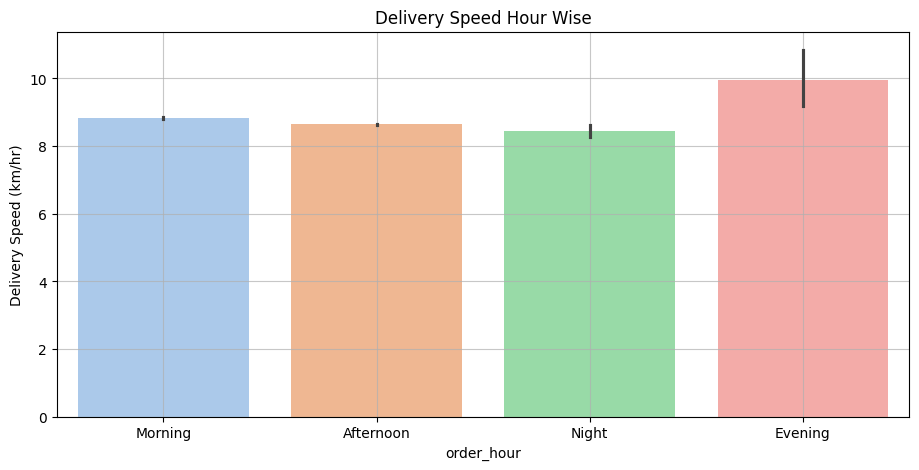

In [172]:
plt.figure(figsize=(11,5))
sns.barplot(x='order_hour', y='Delivery_Speed',data=df1,palette='pastel')
plt.grid(alpha=0.7)

plt.title('Delivery Speed Hour Wise')
plt.ylabel('Delivery Speed (km/hr)')

**Insight:**
- Evening Time of The Day is the best time for Order Deliveries to deliver the orders fastest followed by Morning Time of Day.
- It can be because of Traffic Happening More in Afternoon and less road visibility in Night for Riders.